In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek

from sklearn.pipeline import Pipeline

In [26]:
features_num = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
features_cat = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex']

column_arr = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
           'marital_status', 'occupation', 'relationship', 'race', 'sex',
           'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [27]:
def modify_columns(df_copycat):
    
    workclass_dict = {'Without-pay': 'NP_NW', 'Never-worked': 'NP_NW'}
    education_dict = {'11th': 'Below_HS', '9th': 'Below_HS', '7th-8th': 'Below_HS', '5th-6th': 'Below_HS', 
                      '10th': 'Below_HS', '1st-4th': 'Below_HS', 'Preschool': 'Below_HS', '12th': 'Below_HS'}
    marital_status_dict = {'Divorced': 'DSW', 'Separated': 'DSW', 'Widowed': 'DSW', 'Married-spouse-absent': 'MSA_AF', 'Married-AF-spouse': 'MSA_AF'}

    df_copycat['occupation'] = df_copycat['occupation'].apply(lambda x: 'Other-service' if x is '?' else x)
    df_copycat['marital_status'] = df_copycat['marital_status'].apply(lambda x: marital_status_dict[x] if x in marital_status_dict else x)
    df_copycat['education'] = df_copycat['education'].apply(lambda x: education_dict[x] if x in education_dict else x)
    df_copycat['workclass'] = df_copycat['workclass'].apply(lambda x: workclass_dict[x] if x in workclass_dict else x)
    
    df_copycat = df_copycat.drop(columns=['native_country'])
    le = LabelEncoder()
    df_copycat['income'] = le.fit_transform(df_copycat['income'])
    
    return df_copycat

In [28]:
def import_csv(path):
    return pd.read_csv(path, names=column_arr, skipinitialspace=True) 

In [29]:
df_train = import_csv('./Census Income/adult.data.csv')
df_train = modify_columns(df_train)
X_train = df_train.drop(columns=['income'])
y_train = df_train['income']
X_train.shape

(32561, 13)

In [30]:
df_test = import_csv('./Census Income/adult.test.csv')
df_test = modify_columns(df_test)
X_test = df_test.drop(columns=['income'])
y_test = df_test['income']
X_test.shape

(16281, 13)

In [31]:
X_test.sample(10, random_state=42)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week
13633,29,Private,189346,HS-grad,9,Never-married,Transport-moving,Unmarried,White,Male,0,0,40
1921,31,Private,137076,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40
12140,52,Federal-gov,35546,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40
9933,54,Local-gov,116428,Below_HS,6,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40
7745,41,Private,177054,HS-grad,9,DSW,Machine-op-inspct,Unmarried,White,Male,0,0,40
13499,60,Private,193864,HS-grad,9,DSW,Craft-repair,Not-in-family,White,Female,0,0,40
5046,19,?,171868,HS-grad,9,Never-married,Other-service,Own-child,Black,Male,0,0,20
10062,56,Local-gov,238405,HS-grad,9,DSW,Adm-clerical,Not-in-family,White,Female,0,0,40
8612,33,Private,174215,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55
14440,23,Private,37514,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,55


### Resampling data using Smote

In [8]:
'''
smote = SMOTETomek()
X_resampled, y_resampled = smote.fit_resample(transformer.fit_transform(X_train), y_train)
x_pca = pca.fit_transform(X_resampled)
'''

'\nsmote = SMOTETomek()\nX_resampled, y_resampled = smote.fit_resample(transformer.fit_transform(X_train), y_train)\nx_pca = pca.fit_transform(X_resampled)\n'

In [9]:
'''
xgb = XGBClassifier()
xgb.fit(x_pca, y_resampled)
xtest_pca = pca.fit_transform(transformer.transform(X_test))
xtest_pca = pca.fit_transform(transformer.transform(X_test))

xgb.score(x, y_test)
'''

'\nxgb = XGBClassifier()\nxgb.fit(x_pca, y_resampled)\nxtest_pca = pca.fit_transform(transformer.transform(X_test))\nxtest_pca = pca.fit_transform(transformer.transform(X_test))\n\nxgb.score(x, y_test)\n'

## Model Building

### Pipeline 1: Random Forest

In [62]:
transformer = ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'), features_cat), 
                                              ('RobustScaler', RobustScaler(), features_num)], 
                                               remainder='passthrough', sparse_threshold=0)

pca = PCA(n_components=30)

from sklearn.ensemble import RandomForestClassifier
clf_rnd = RandomForestClassifier(n_estimators=100, class_weight='balanced')

In [63]:
#pipe = Pipeline([('preprocessor', transformer), ('Data-Balancing', smote), ('PCA', pca), ('Random Forest Clf', clf_rnd)])
pipe_rfc = Pipeline([('preprocessor', transformer), ('PCA', pca), ('Random Forest Clf', clf_rnd)])

In [64]:
pipe_rfc.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['workclass', 'education',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education_num',
                                                   'capital_gain',
                                                   'capital_loss',
                                            

In [65]:
y_pred = pipe_rfc.predict(X_test)
y_pred_proba = pipe_rfc.predict_proba(X_test)

In [66]:
pipe_rfc.score(X_test, y_test)

0.8528960137583687

0.899322122462703

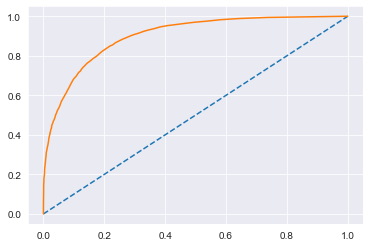

In [67]:
sns.set_style(style='darkgrid')
fpr, tpr, threshold = roc_curve(y_test, pipe_rfc.predict_proba(X_test)[:,1])

plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr)
roc_auc_score(y_test, pipe_rfc.predict_proba(X_test)[:,1])

In [68]:
print(classification_report(y_test, pipe_rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     12435
           1       0.74      0.58      0.65      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.76      0.78     16281
weighted avg       0.85      0.85      0.85     16281



<AxesSubplot:>

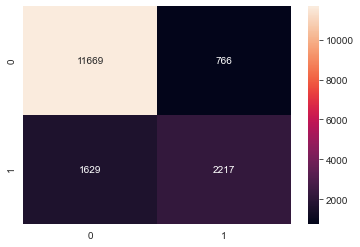

In [69]:
cm = confusion_matrix(y_test, pipe_rfc.predict(X_test))
sns.heatmap(cm, annot=True, fmt='.5g')

### Pipeline 2: XGBoost

In [55]:
df_train['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [82]:
transformer = ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'), features_cat), 
                                              ('RobustScaler', RobustScaler(), features_num)], 
                                               remainder='passthrough', sparse_threshold=0)

pca = PCA(n_components=30)

from xgboost import XGBClassifier
#negative class refers to the majority class (class 0) and the positive class refers to the minority class (class 1)
clf_xgb = XGBClassifier(scale_pos_weight=3.15) #scale_pos_weight = total_negative_examples / total_positive_examples here=======scale_pos_weight=3.15

pipe_xgb= Pipeline([('preprocessor', transformer), ('PCA', pca), ('XGBoost Classifier', clf_xgb)])

In [83]:
pipe_xgb.fit(X_train,y_train)

[17:49:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['workclass', 'education',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education_num',
                                                   'capital_gain',
                                                   'capital_loss',
                                            

In [84]:
y_pred = pipe_xgb.predict(X_test)
pipe_xgb.score(X_test, y_test)

0.8382163257785148

In [85]:
print(classification_report(y_test, pipe_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89     12435
           1       0.62      0.81      0.70      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.83      0.80     16281
weighted avg       0.86      0.84      0.84     16281



0.9205935241832673

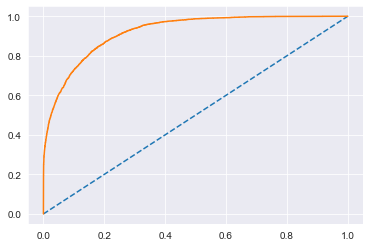

In [86]:
sns.set_style(style='darkgrid')
fpr, tpr, threshold = roc_curve(y_test, pipe_xgb.predict_proba(X_test)[:,1])

plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr)
roc_auc_score(y_test, pipe_xgb.predict_proba(X_test)[:,1])

<AxesSubplot:>

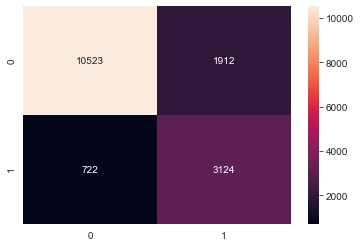

In [87]:
cm = confusion_matrix(y_test, pipe_xgb.predict(X_test))
sns.heatmap(cm, annot=True, fmt='.5g')

### Pipeline 3: Gradinet Boost

In [89]:
transformer = ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'), features_cat), 
                                              ('RobustScaler', RobustScaler(), features_num)], 
                                               remainder='passthrough', sparse_threshold=0)

pca = PCA(n_components=30)

from sklearn.ensemble import GradientBoostingClassifier
clf_gbm = GradientBoostingClassifier()

pipe_gbm= Pipeline([('preprocessor', transformer), ('PCA', pca), ('GBM Classifier', clf_gbm)])

In [90]:
pipe_gbm.fit(X_train,y_train)

y_pred = pipe_gbm.predict(X_test)
pipe_gbm.score(X_test, y_test)

0.8667158036975616

In [91]:
print(classification_report(y_test, pipe_gbm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     12435
           1       0.79      0.60      0.68      3846

    accuracy                           0.87     16281
   macro avg       0.83      0.77      0.80     16281
weighted avg       0.86      0.87      0.86     16281



0.9167282662355951

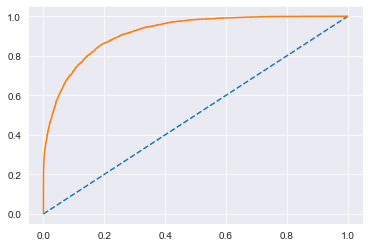

In [92]:
sns.set_style(style='darkgrid')
fpr, tpr, threshold = roc_curve(y_test, pipe_gbm.predict_proba(X_test)[:,1])

plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr)
roc_auc_score(y_test, pipe_gbm.predict_proba(X_test)[:,1])

<AxesSubplot:>

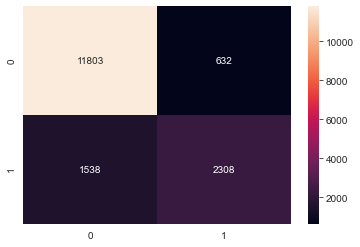

In [93]:
cm = confusion_matrix(y_test, pipe_gbm.predict(X_test))
sns.heatmap(cm, annot=True, fmt='.5g')

## Using XGBoost to export test results

In [95]:
pipe_xgb.fit(X_train,y_train)
y_pred = pipe_xgb.predict(X_test)
pipe_xgb.score(X_test, y_test)

[17:59:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.841041705054972

In [96]:
print(classification_report(y_test, pipe_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89     12435
           1       0.62      0.82      0.71      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.83      0.80     16281
weighted avg       0.86      0.84      0.85     16281



0.9212518721898855

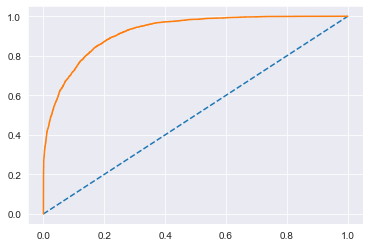

In [97]:
sns.set_style(style='darkgrid')
fpr, tpr, threshold = roc_curve(y_test, pipe_xgb.predict_proba(X_test)[:,1])

plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr)
roc_auc_score(y_test, pipe_xgb.predict_proba(X_test)[:,1])

<AxesSubplot:>

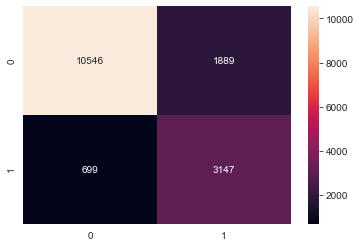

In [98]:
cm = confusion_matrix(y_test, pipe_xgb.predict(X_test))
sns.heatmap(cm, annot=True, fmt='.5g')

In [106]:
np.savetxt("predicted.csv", y_pred, fmt='%d', delimiter=",")